# XRD data 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

In [4]:
data1 = pd.read_csv("xrd_data.csv",skiprows=1,header=None)
print(data1)

             0          1
0     3.000000 -16.092531
1     3.040000  -1.467009
2     3.080000  -1.536156
3     3.120000   7.425698
4     3.160000  18.123781
..         ...        ...
921  39.840000  38.252766
922  39.880001   1.080764
923  39.919998 -19.641809
924  39.959999 -24.333986
925  40.000000 -31.015686

[926 rows x 2 columns]


Found 6 peaks:

  Peak  1: 2θ =  4.84°,  Intensity =  955.0
  Peak  2: 2θ =  9.80°,  Intensity = 1348.0
  Peak  3: 2θ = 12.92°,  Intensity =  886.8
  Peak  4: 2θ = 14.32°,  Intensity = 9142.1
  Peak  5: 2θ = 17.20°,  Intensity = 4170.7
  Peak  6: 2θ = 18.84°,  Intensity = 2422.1



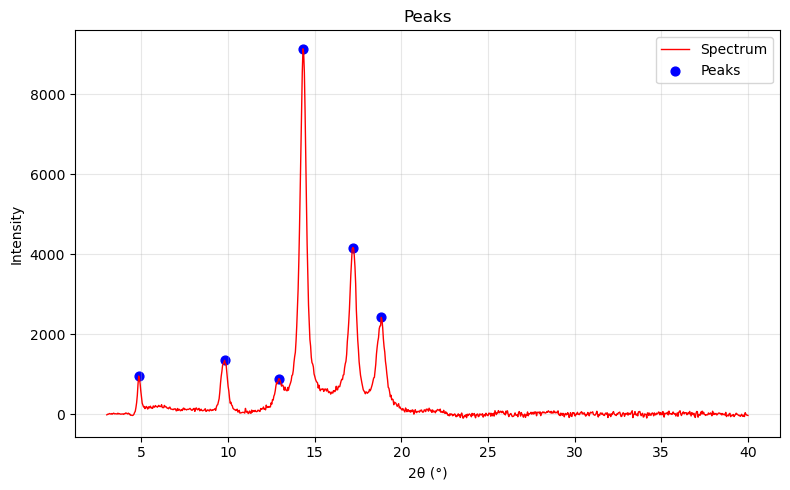

In [7]:
#Data import
x = data1.iloc[:,0].values
y = data1.iloc[:,1].values
#Detect peak(by find peak)
peaks, props = find_peaks(
    y,
    prominence=0.03 * np.max(y),  
    distance=35                )
peak_x = x[peaks]
peak_y = y[peaks]
#print
print(f"Found {len(peaks)} peaks:\n")
for i, (xi, yi) in enumerate(zip(peak_x, peak_y), start=1):
    print(f"  Peak {i:2d}: 2θ = {xi:5.2f}°,  Intensity = {yi:6.1f}")
print()  
#Plot
plt.figure(figsize=(8,5))
plt.plot(x, y, color='red', linewidth=1, label='Spectrum')
plt.scatter(peak_x, peak_y, color='b', s=40, label='Peaks')
plt.xlabel('2θ (°)')
plt.ylabel('Intensity')
plt.title('Peaks')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

             0          1
0     3.000000 -16.092531
1     3.040000  -1.467009
2     3.080000  -1.536156
3     3.120000   7.425698
4     3.160000  18.123781
..         ...        ...
921  39.840000  38.252766
922  39.880001   1.080764
923  39.919998 -19.641809
924  39.959999 -24.333986
925  40.000000 -31.015686

[926 rows x 2 columns]
Found 7 peaks:

  Peak  1: 2θ =  4.80°,  Intensity = 1727.2
  Peak  2: 2θ =  9.84°,  Intensity = 2991.8
  Peak  3: 2θ = 12.96°,  Intensity = 1541.0
  Peak  4: 2θ = 14.36°,  Intensity = 19652.7
  Peak  5: 2θ = 17.24°,  Intensity = 10683.4
  Peak  6: 2θ = 18.84°,  Intensity = 6858.3
  Peak  7: 2θ = 22.08°,  Intensity =  506.5



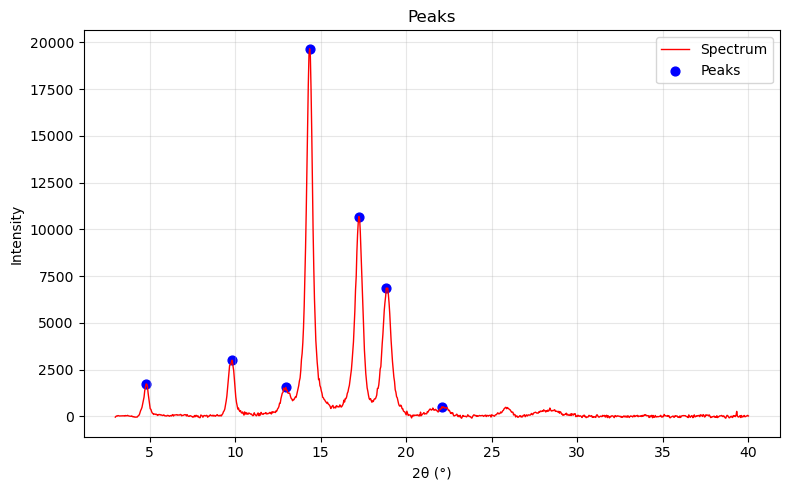

In [9]:
# Data 2 Peaks Graph

data2 = pd.read_csv("xrd_validation_data.csv", skiprows=1, header=None, encoding='ISO-8859-1', engine='python')

print(data1)
x = data2.iloc[:,0].values
y = data2.iloc[:,1].values

# Detect peaks
peaks, props = find_peaks(
    y,
    prominence=0.03 * np.max(y),  
    distance=35                )
peak_x = x[peaks]
peak_y = y[peaks]

# Print peak
print(f"Found {len(peaks)} peaks:\n")
for i, (xi, yi) in enumerate(zip(peak_x, peak_y), start=1):
    print(f"  Peak {i:2d}: 2θ = {xi:5.2f}°,  Intensity = {yi:6.1f}")
print()  

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, y, color='red', linewidth=1, label='Spectrum')
plt.scatter(peak_x, peak_y, color='b', s=40, label='Peaks')
plt.xlabel('2θ (°)')
plt.ylabel('Intensity')
plt.title('Peaks')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

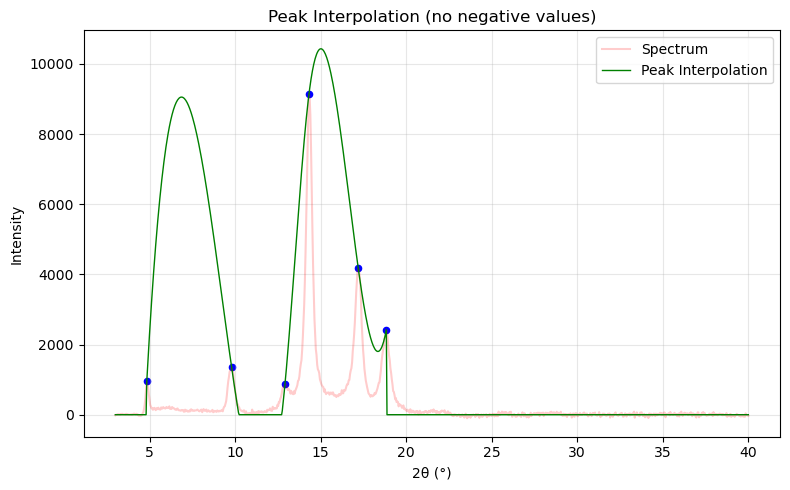

In [11]:
# Peak Interpolation 
x = data1.iloc[:,0].values
y = data1.iloc[:,1].values
# Peak detection
peaks, _ = find_peaks(y,
                      prominence=0.03 * np.max(y),
                      distance=34)
px, py = x[peaks], y[peaks]
# Cubic interpolation
f_interp = interp1d(px, py,
                    kind='cubic',
                    bounds_error=False,
                    fill_value=0.0)
y_interp = f_interp(x)
y_interp = np.clip(y_interp, 0, None)# remove negative
# Plot
plt.figure(figsize=(8,5))
plt.plot(x, y, color='r', alpha=0.2, label='Spectrum')# plot spectrum in light colour
plt.plot(x, y_interp, color='g', linewidth=1, label='Peak Interpolation')
plt.scatter(px, py, color='b', s=20)
plt.xlabel('2θ (°)')
plt.ylabel('Intensity')
plt.title('Peak Interpolation (no negative values)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [13]:
from scipy.signal import peak_widths
import numpy as np
import pandas as pd
# FWHM in 2θ units
idxs = peaks
widths_pts, _, left_ips, right_ips = peak_widths(y, idxs, rel_height=0.5)
fwhm_2theta = []
for li, ri in zip(left_ips, right_ips):
    x_li = np.interp(li, np.arange(len(x)), x)
    x_ri = np.interp(ri, np.arange(len(x)), x)
    fwhm_2theta.append(x_ri - x_li)
fwhm_2theta = np.array(fwhm_2theta)
peak_pos = x[idxs]
# Scherrer equation → D (nm)
wavelength = 1.5406
K = 0.9
sizes_nm = []
for θ2, β in zip(peak_pos, fwhm_2theta):
    θ_rad = np.deg2rad(θ2 / 2)
    β_rad = np.deg2rad(β)
    D_ang = (K * wavelength) / (β_rad * np.cos(θ_rad))
    sizes_nm.append(D_ang / 10)  #armstrong to nm
table = pd.DataFrame({
    "2θ (°)": peak_pos,
    "FWHM (°)": fwhm_2theta,
    "Size (nm)": sizes_nm}, index=np.arange(1, len(peak_pos) + 1))
display(table.style.format({
    "2θ (°)": "{:.2f}",
    "FWHM (°)": "{:.4f}",
    "Size (nm)": "{:.1f}"}))

,2θ (°),FWHM (°),Size (nm)
1,4.84,0.2141,37.1
2,9.80,0.4612,17.3
3,12.92,0.2923,27.4
4,14.32,0.4328,18.5
5,17.20,0.4624,17.4
6,18.84,0.5006,16.1


# SEM data

>>> rounds.jpg → Shape: CIRCLE
>>> rounds_lines.jpg → Shape: CIRCLE
>>> sem_image.jpg → Shape: LINE
>>> bumps.jpg → Shape: CIRCLE


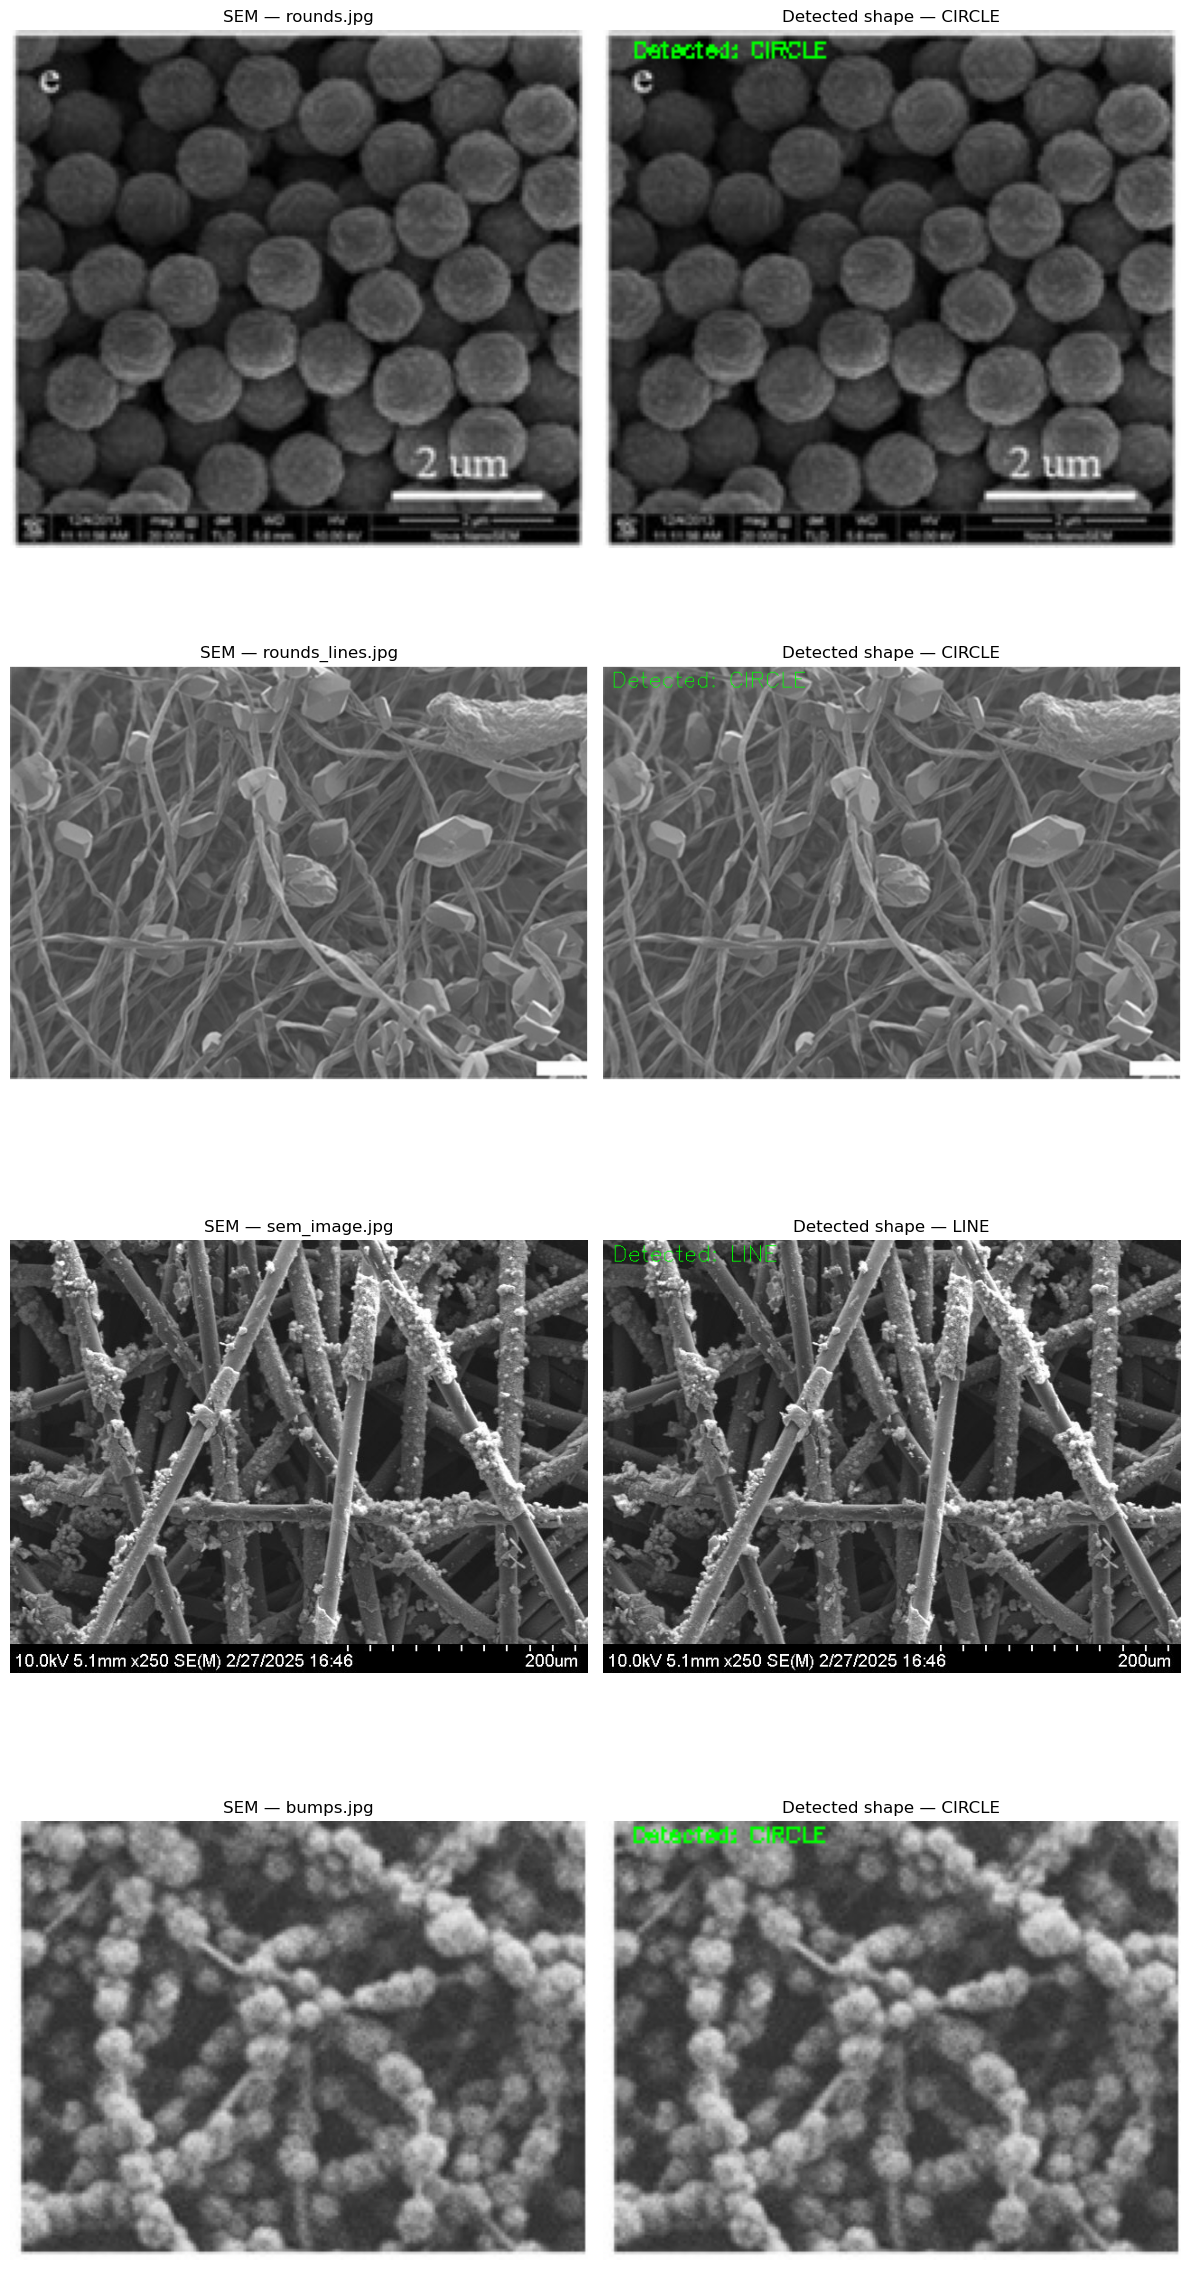

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#import images
image_paths = ['rounds.jpg','rounds_lines.jpg','sem_image.jpg','bumps.jpg']
#Set N×2 grid of subplots
n = len(image_paths)
fig, axes = plt.subplots(n, 2, figsize=(12, 6 * n))
if n == 1:
    axes = np.expand_dims(axes, 0)
for idx, img_file in enumerate(image_paths):
    img = cv2.imread(img_file)
    if img is None:
        raise FileNotFoundError(f"Could not load '{img_file}'")
#Grayscale + Otsu threshold
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(
        gray, 0, 255,
        cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#Remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
#contour
    contours, _ = cv2.findContours(
        clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    counts = {'line': 0, 'circle': 0}

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area < 100:
            continue
        rect = cv2.minAreaRect(cnt)
        (w_rot, h_rot) = rect[1]
        if w_rot == 0 or h_rot == 0:
            continue
        aspect = max(w_rot / h_rot, h_rot / w_rot)
#measure surface area of circle 
        per = cv2.arcLength(cnt, True)
        circ = (4 * np.pi * area / (per * per)) if per > 0 else 0
#take line first then circle
        if aspect > 4:
            counts['line'] += 1
        elif circ > 0.5:
            counts['circle'] += 1
#shape
    detected = 'LINE' if counts['line'] >= counts['circle'] else 'CIRCLE'
    annot = img.copy()
    h, w = img.shape[:2]
    fontScale = w / 800                    # adjust base width
    thickness = max(1, int(round(fontScale)))
    y_pos = int(h * 0.05)                  # percent down from top

    cv2.putText(
        annot,
        f'Detected: {detected}',
        (10, y_pos),
        cv2.FONT_HERSHEY_SIMPLEX,
        fontScale,
        (0, 255, 0),
        thickness)
#Convert colours plotting ---
    orig_rgb  = cv2.cvtColor(img,   cv2.COLOR_BGR2RGB)
    annot_rgb = cv2.cvtColor(annot, cv2.COLOR_BGR2RGB)
    ax_orig, ax_annot = axes[idx]
    ax_orig.imshow(orig_rgb)
    ax_orig.set_title(f'SEM — {img_file}')
    ax_orig.axis('off')

    ax_annot.imshow(annot_rgb)
    ax_annot.set_title(f'Detected shape — {detected}')
    ax_annot.axis('off')

    print(f">>> {img_file} → Shape: {detected}")
plt.tight_layout()
plt.show()

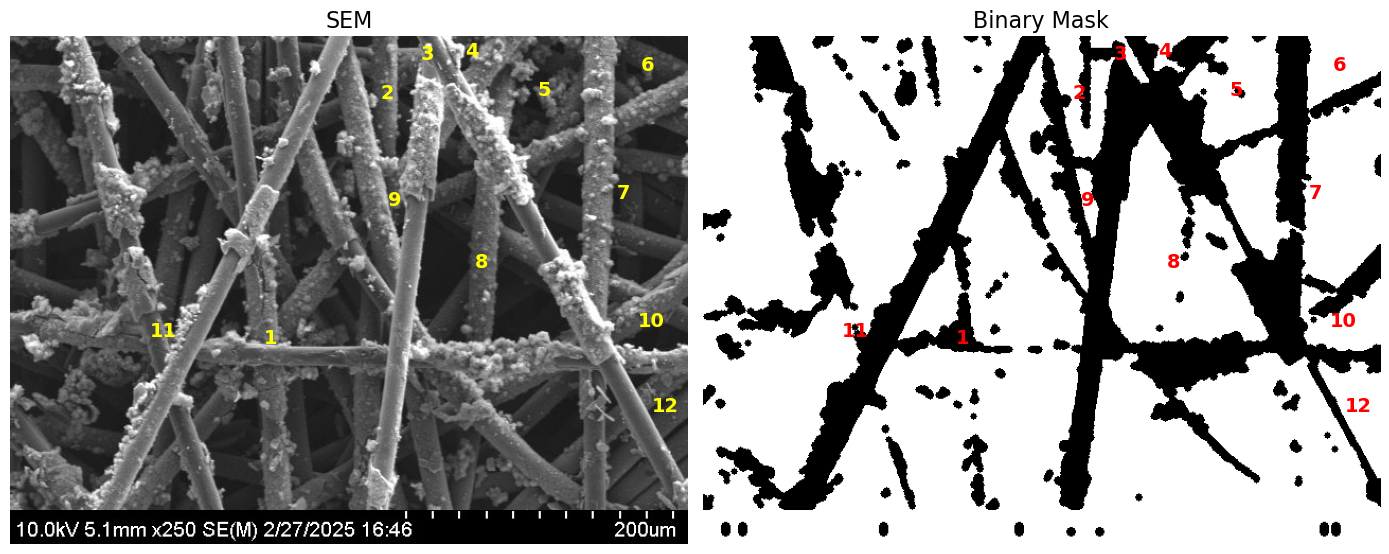

In [17]:
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, measure
img_path  = 'sem_image.jpg'  
min_size  = 200              # remove specks (px)
closing_r = 3                # radius closing (px)

# Load & Binarize (Otsu) 
img = io.imread(img_path, as_gray=True)
th  = filters.threshold_otsu(img)
bw  = img < th                # True for wire; flip to img > th if needed
bw = morphology.remove_small_objects(bw, min_size=min_size)
bw = morphology.binary_closing(bw, morphology.disk(closing_r))

# Label 
labels = measure.label(bw, connectivity=2)
props  = measure.regionprops(labels)

# Plot 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
# Left: SEM + IDs
ax1.imshow(img, cmap='gray')
for prop in props:
    y0, x0 = prop.centroid
    ax1.text(x0, y0, str(prop.label),
             color='yellow', fontsize=14, fontweight='bold',
             ha='center', va='center')
ax1.set_title('SEM', fontsize=16)
ax1.axis('off')
# Right: Clean Binary Mask + IDs
ax2.imshow(bw, cmap='gray')
for prop in props:
    y0, x0 = prop.centroid
    ax2.text(x0, y0, str(prop.label),
             color='red', fontsize=14, fontweight='bold',
             ha='center', va='center')
ax2.set_title('Binary Mask', fontsize=16)
ax2.axis('off')
plt.tight_layout()
plt.show()

In [20]:
import numpy as np
import pandas as pd
from skimage import io, filters, morphology, measure
from scipy import ndimage
from collections import defaultdict
img_path   = 'sem_image.jpg'   
nm_per_px  = 2.5               # nm per pixel calibration
min_size   = 200               # remove objects smaller than this (px)
closing_r  = 3                 # radius closing (px)

# Load 
img    = io.imread(img_path, as_gray=True)
thresh = filters.threshold_otsu(img)
bw     = img < thresh          # True for wire regions (flip if needed)
bw = morphology.remove_small_objects(bw, min_size=min_size)
bw = morphology.binary_closing(bw, morphology.disk(closing_r))

# Label
labels = measure.label(bw, connectivity=2)

# Distance & skeletonize
dist_map = ndimage.distance_transform_edt(bw)
skeleton = morphology.skeletonize(bw)

# Sample diameters (px) along skeleton
ys, xs = np.where(skeleton)
wire_diams_px = defaultdict(list)
for y, x in zip(ys, xs):
    lid = labels[y, x]
    if lid > 0:
        wire_diams_px[lid].append(dist_map[y, x] * 2)

# Convert all diameters in nm 
print("All diameters (nm) per wire:\n")
for lid in sorted(wire_diams_px):
    diams_nm = np.array(wire_diams_px[lid]) * nm_per_px
    diams_nm_rounded = np.round(diams_nm, 1).tolist()
    print(f"Wire #{lid}: {diams_nm_rounded} \n")
print("\n")  

# Table of Min/Max in nm
stats = []
for lid in sorted(wire_diams_px):
    diams = np.array(wire_diams_px[lid]) * nm_per_px
    stats.append({
        'Wire ID':    lid,
        'Min (nm)':  round(diams.min(), 1),
        'Max (nm)':  round(diams.max(), 1)
    })
df = pd.DataFrame(stats)
print("Nano-wire Table: \n")
print(df.to_string(index=False))
print("\n")

All diameters (nm) per wire:

Wire #1: [10.0, 10.0, 10.0, 11.2, 15.8, 18.0, 14.1, 18.0, 15.8, 15.0, 15.0, 14.1, 11.2, 10.0, 7.1, 5.0, 7.1, 10.0, 11.2, 14.1, 15.0, 18.0, 14.1, 11.2, 18.0, 22.4, 18.0, 25.0, 21.2, 18.0, 15.8, 15.8, 20.6, 20.6, 15.8, 18.0, 10.0, 20.6, 25.5, 20.6, 20.6, 25.5, 25.0, 29.2, 25.0, 22.4, 26.9, 29.2, 25.0, 20.6, 11.2, 25.5, 26.9, 22.4, 31.6, 29.2, 33.5, 26.9, 31.6, 26.9, 25.0, 30.0, 35.0, 39.1, 14.1, 29.2, 35.4, 30.4, 36.1, 36.1, 40.3, 30.4, 33.5, 25.0, 39.1, 43.0, 15.8, 31.6, 42.7, 38.1, 38.1, 42.7, 47.2, 35.0, 36.4, 22.4, 44.7, 18.0, 35.4, 49.2, 44.7, 40.3, 49.2, 53.9, 40.0, 40.3, 20.6, 47.2, 21.2, 40.0, 57.0, 52.2, 42.7, 57.0, 45.3, 57.0, 61.0, 64.0, 67.3, 42.7, 20.0, 49.2, 25.0, 20.6, 15.8, 45.3, 55.2, 60.2, 46.1, 60.4, 65.0, 51.0, 49.2, 51.5, 67.3, 41.2, 20.6, 52.2, 26.9, 51.0, 50.2, 67.1, 66.7, 61.8, 57.0, 5.0, 40.3, 42.7, 67.1, 40.3, 22.4, 55.9, 60.8, 29.2, 52.2, 55.0, 63.2, 5.0, 33.5, 65.2, 40.0, 25.0, 65.2, 31.6, 53.9, 60.2, 65.0, 7.1, 25.5, 26.9, 64.0, 